# Parareal Speedup Test using Lorenz system as test case

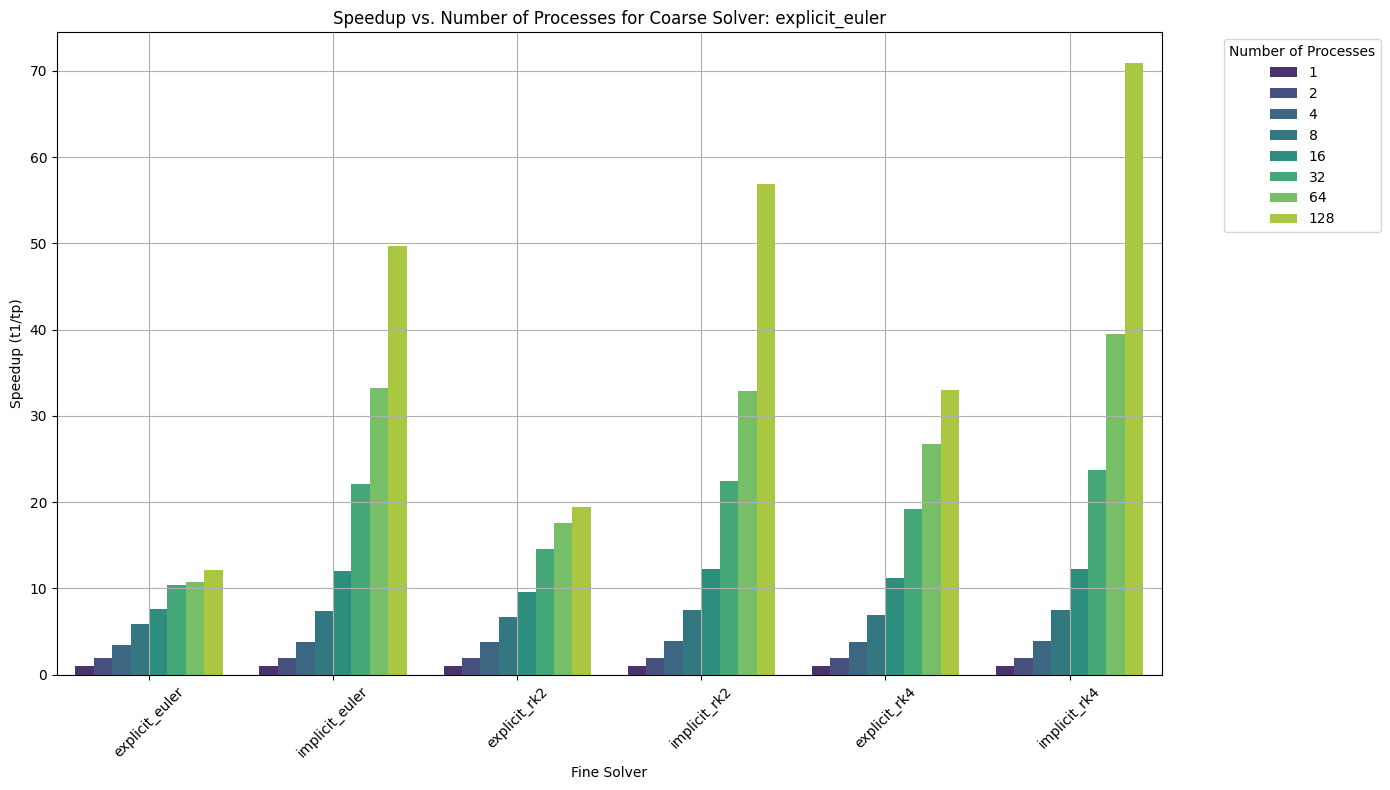

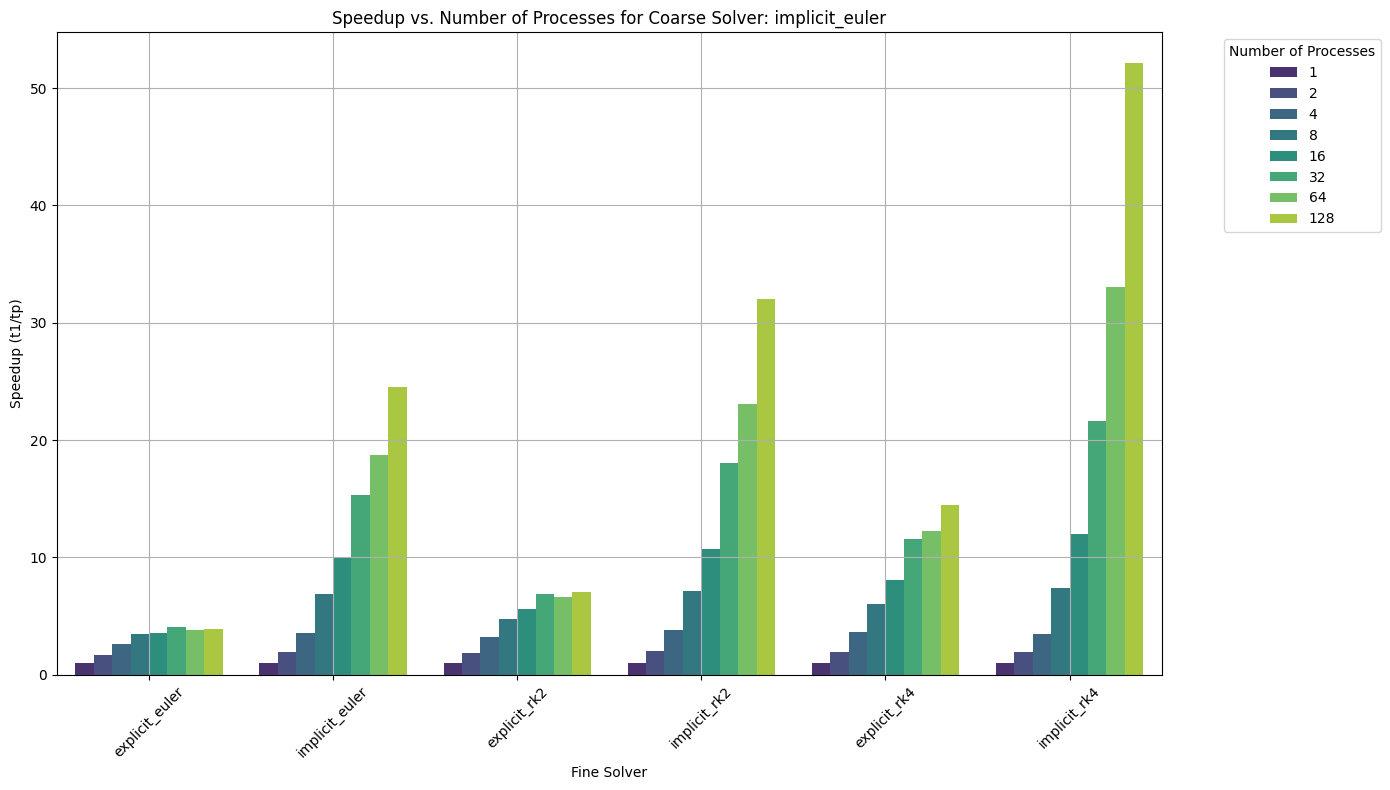

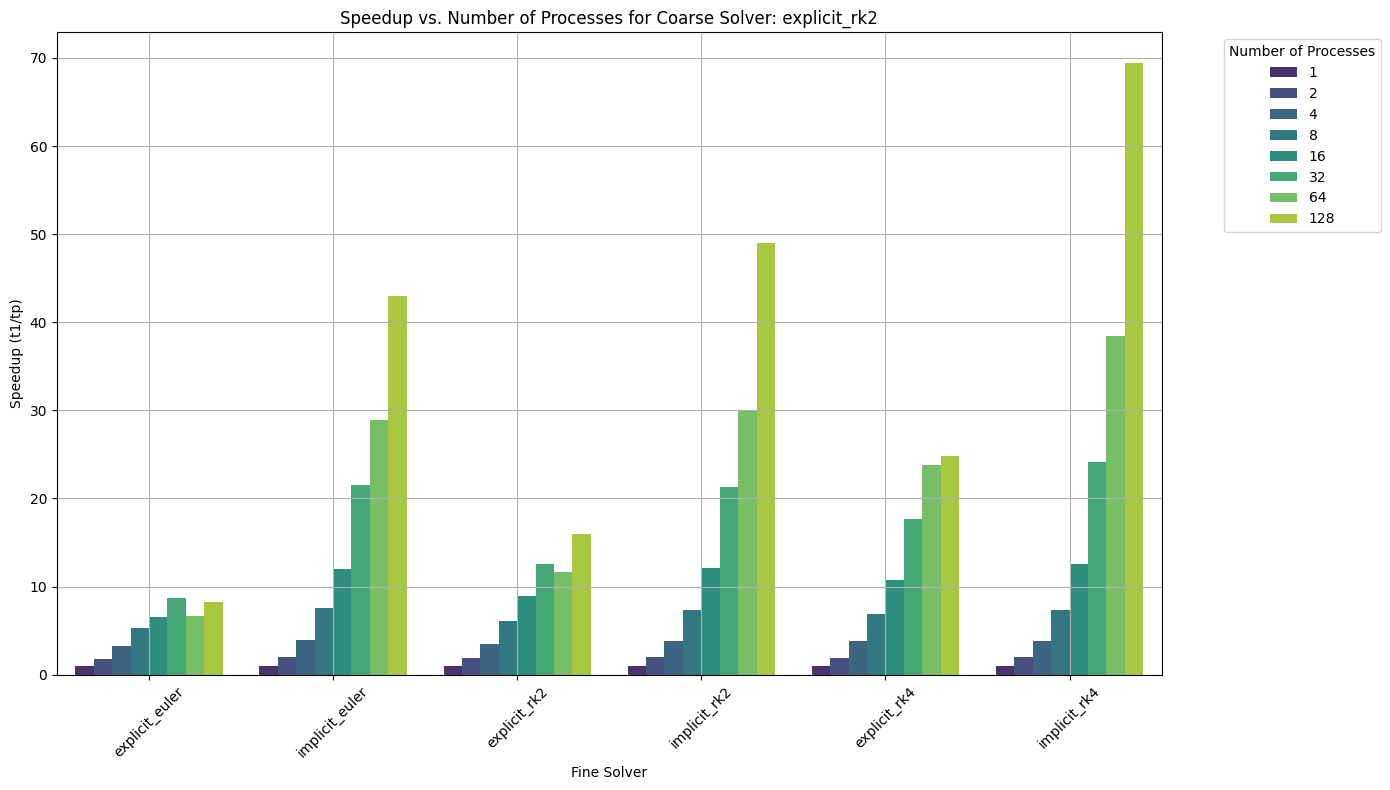

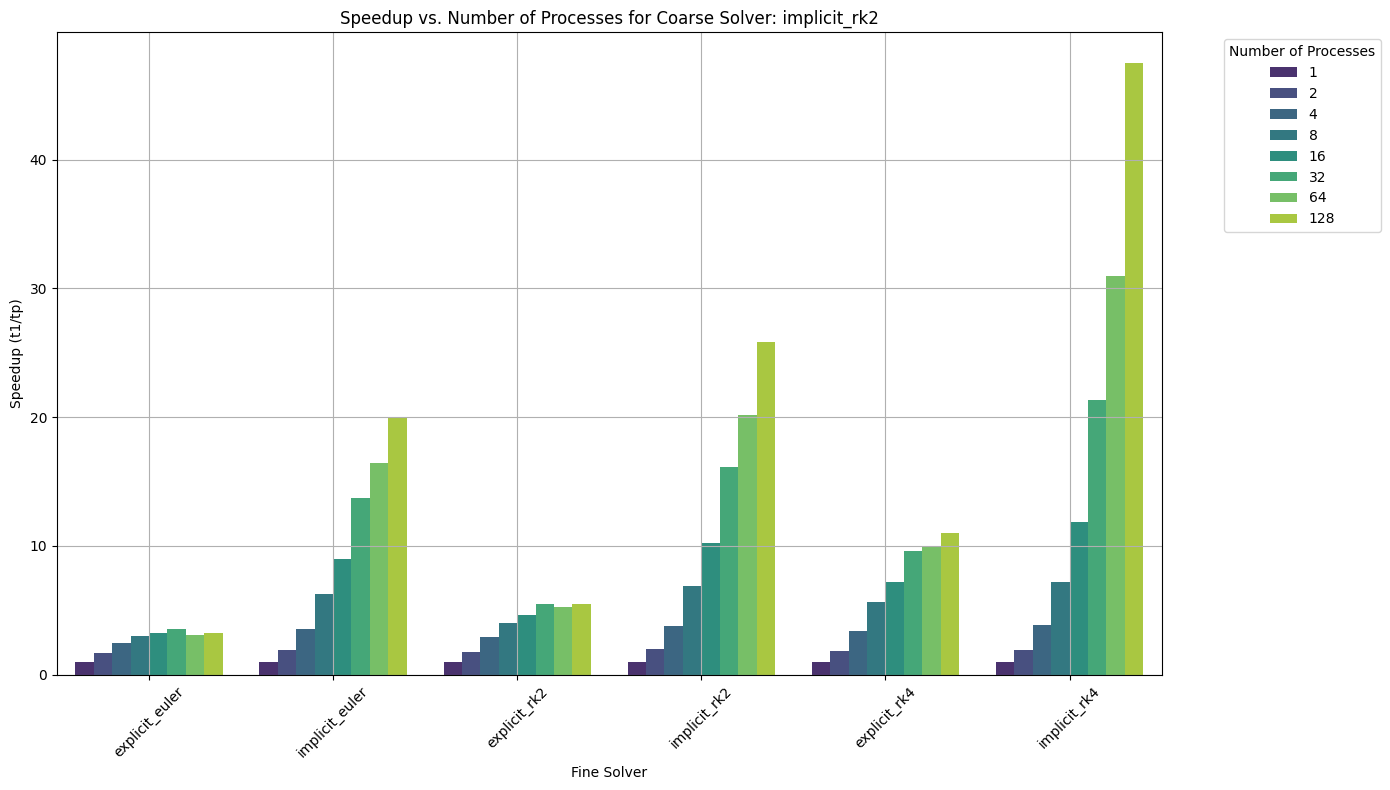

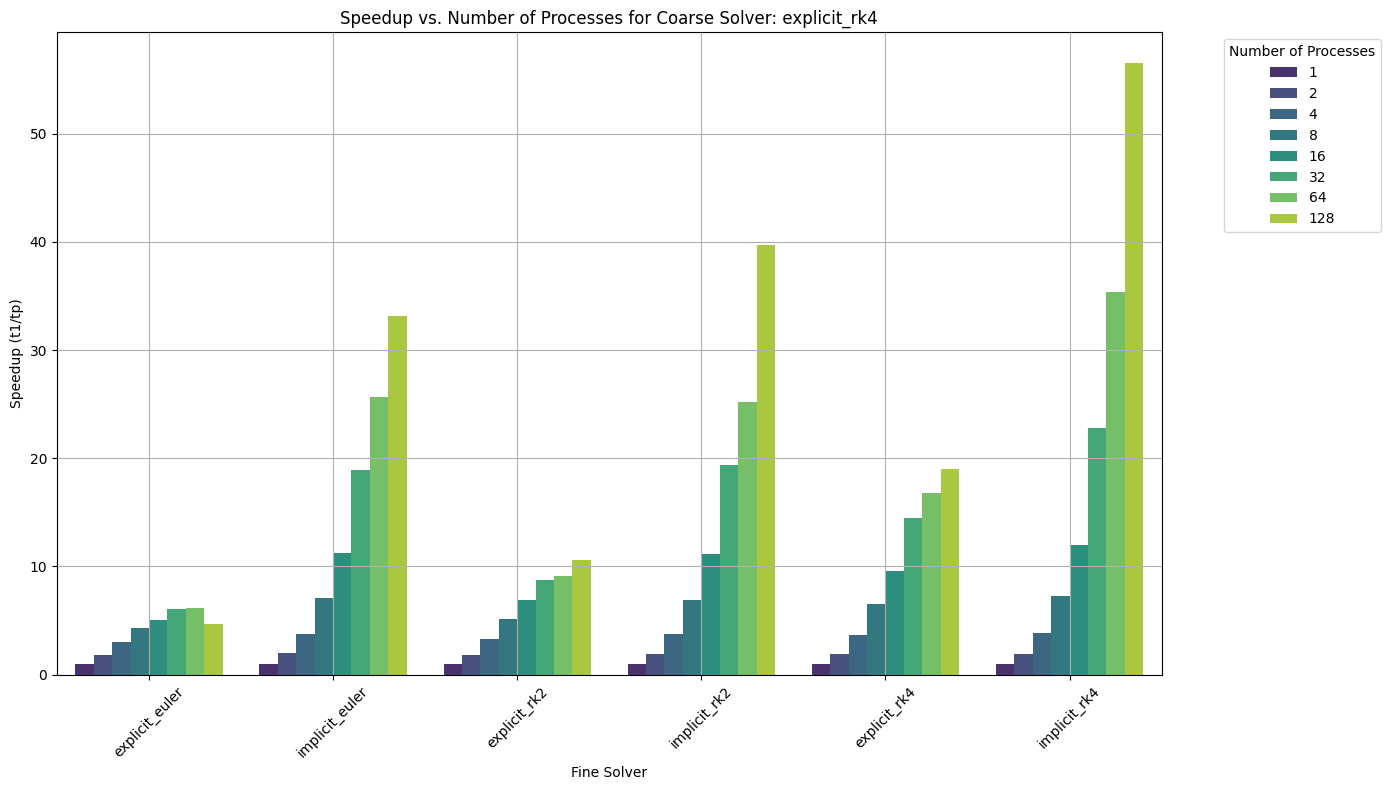

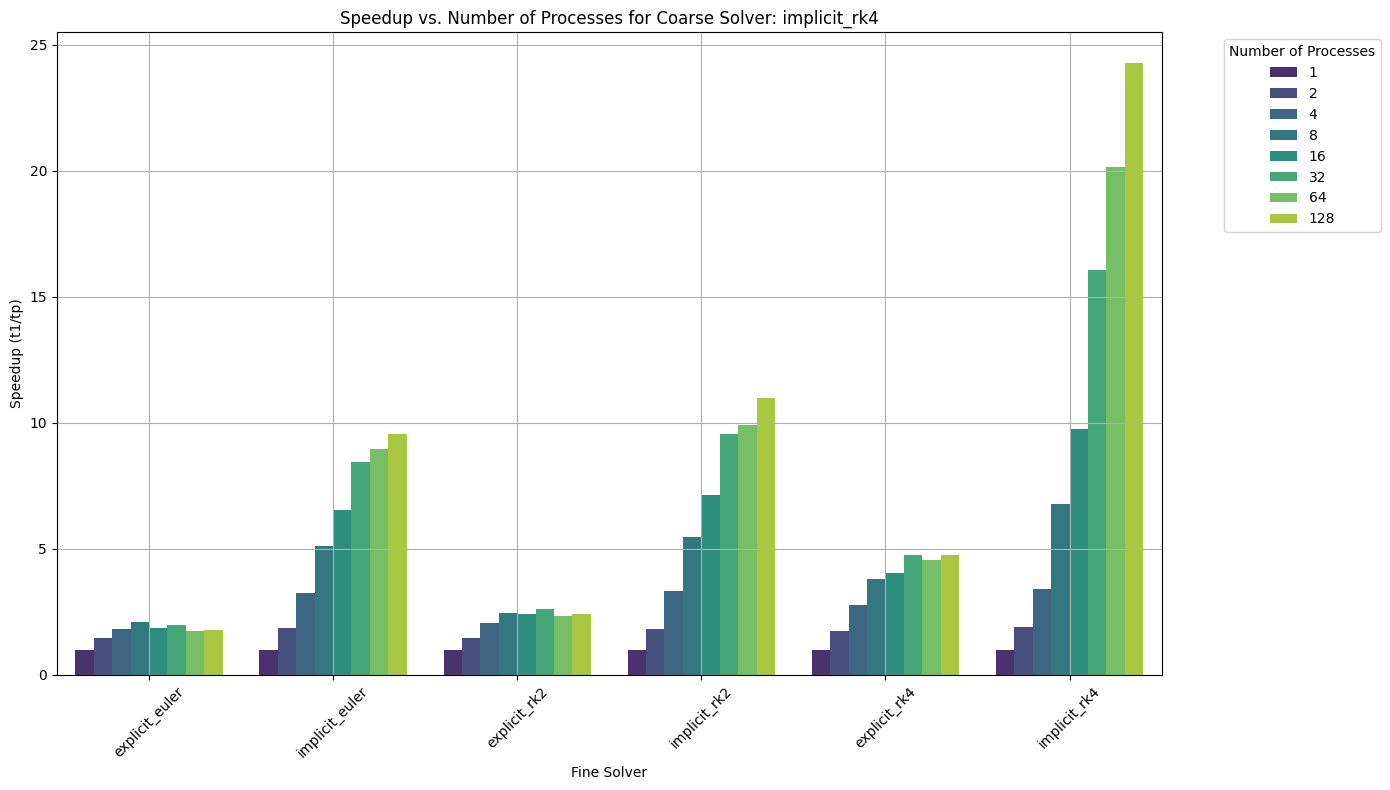

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Read execution times into a dataframe
data = pd.read_csv("./python/data/data_speedup_2024-07-15_14-45-51.txt", header=None, names=["processes", "G_solver", "F_solver", "time"])

# Ensure 'processes' column is of type int
data['processes'] = data['processes'].astype(str)

# Group by solver combination and get the reference time (1 process)
ref_times = data[data['processes'] == '1'].set_index(['G_solver', 'F_solver'])['time']

# Calculate speedup for each row
data['speedup'] = data.apply(lambda row: ref_times.loc[row['G_solver'], row['F_solver']] / row['time'], axis=1)

# List of unique G_solvers
g_solvers = data['G_solver'].unique()

# Create subplots for each G_solver
for g_solver in g_solvers:
    subset = data[data['G_solver'] == g_solver]
    
    plt.figure(figsize=(14, 8))
    sns.barplot(data=subset, x='F_solver', y='speedup', hue='processes',palette='viridis')
    
    plt.title(f'Speedup vs. Number of Processes for Coarse Solver: {g_solver}')
    plt.ylabel('Speedup (t1/tp)')
    plt.xlabel('Fine Solver')
    plt.xticks(rotation=45)
    plt.legend(title='Number of Processes', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


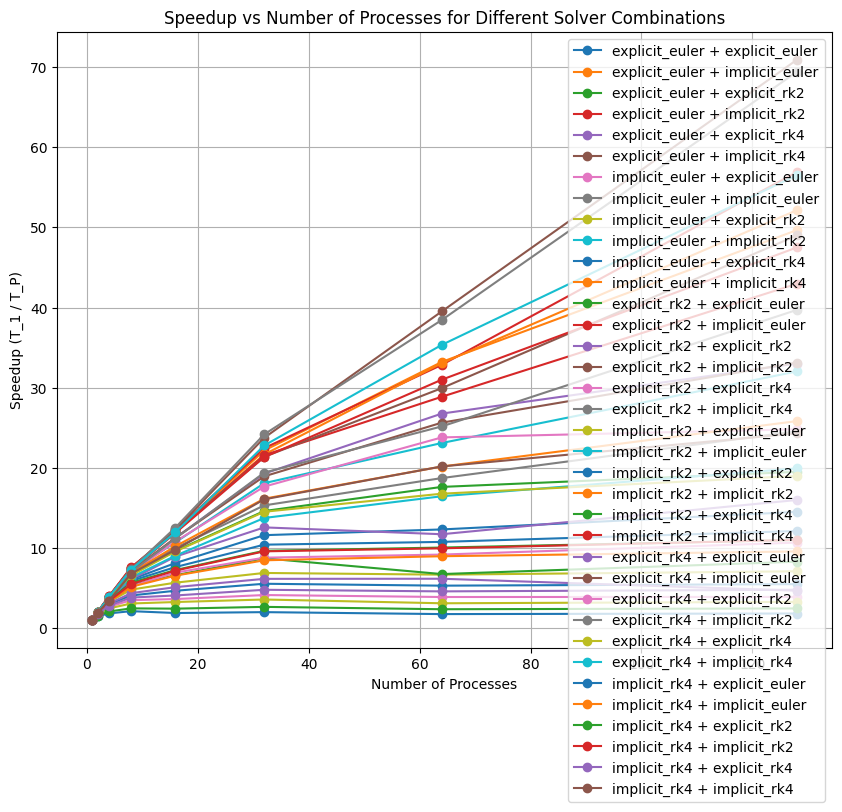

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Read execution times into a dataframe
data = pd.read_csv("./python/data/data_speedup_2024-07-15_14-45-51.txt", header=None, names=["processes", "G_solver", "F_solver", "time"])

# Group by solver combination and get the reference time (1 process)
ref_times = data[data['processes'] == 1].set_index(['G_solver', 'F_solver'])['time']

# Calculate speedup for each row
data['speedup'] = data.apply(lambda row: ref_times.loc[row['G_solver'], row['F_solver']] / row['time'], axis=1)

# Plot the results for each solver combination
solver_combinations = data[['G_solver', 'F_solver']].drop_duplicates()

plt.figure(figsize=(10, 8))

for _, (G_solver, F_solver) in solver_combinations.iterrows():
    solver_data = data[(data['G_solver'] == G_solver) & (data['F_solver'] == F_solver)]
    plt.plot(solver_data['processes'], solver_data['speedup'], marker='o', label=f"{G_solver} + {F_solver}")

plt.xlabel('Number of Processes')
plt.ylabel('Speedup (T_1 / T_P)')
plt.title('Speedup vs Number of Processes for Different Solver Combinations')
plt.legend()
plt.grid(True)
plt.show()


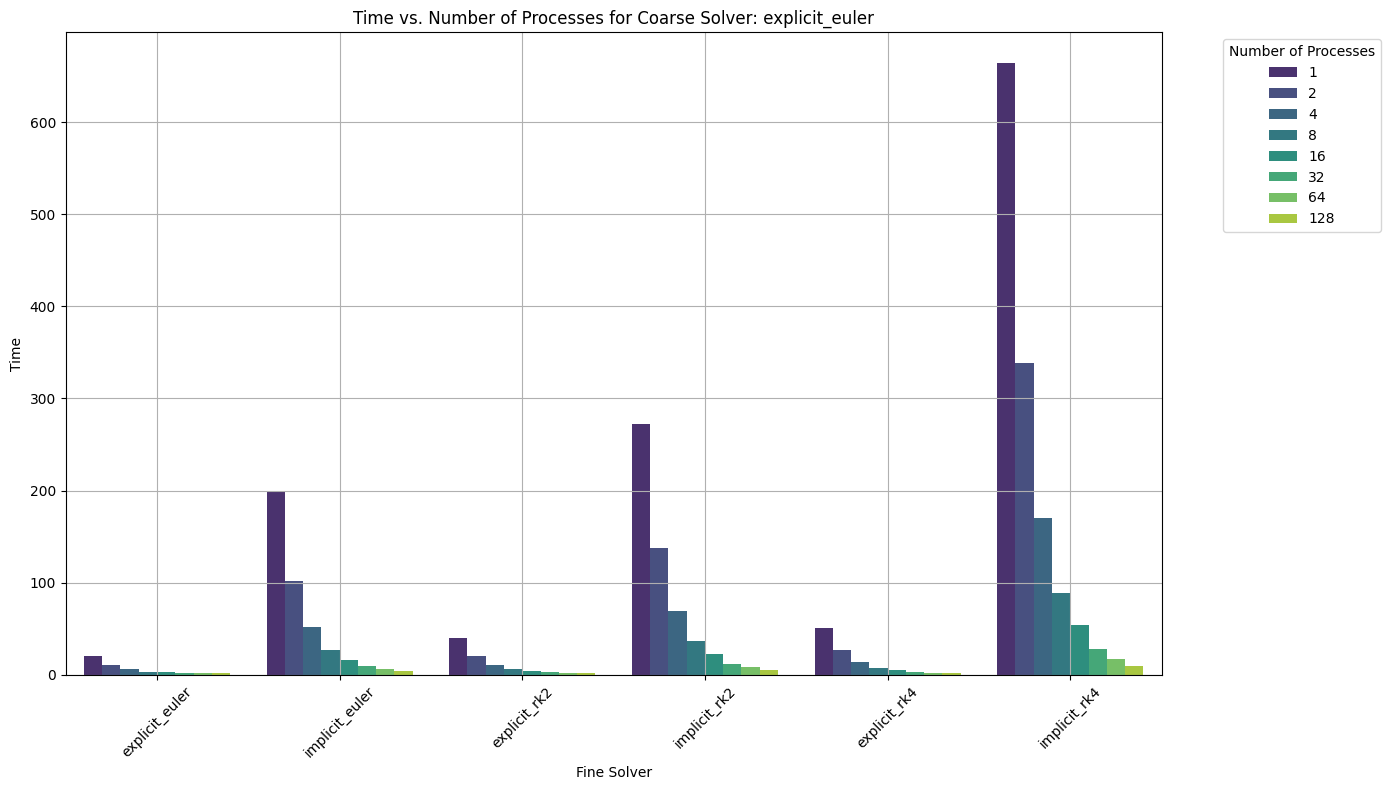

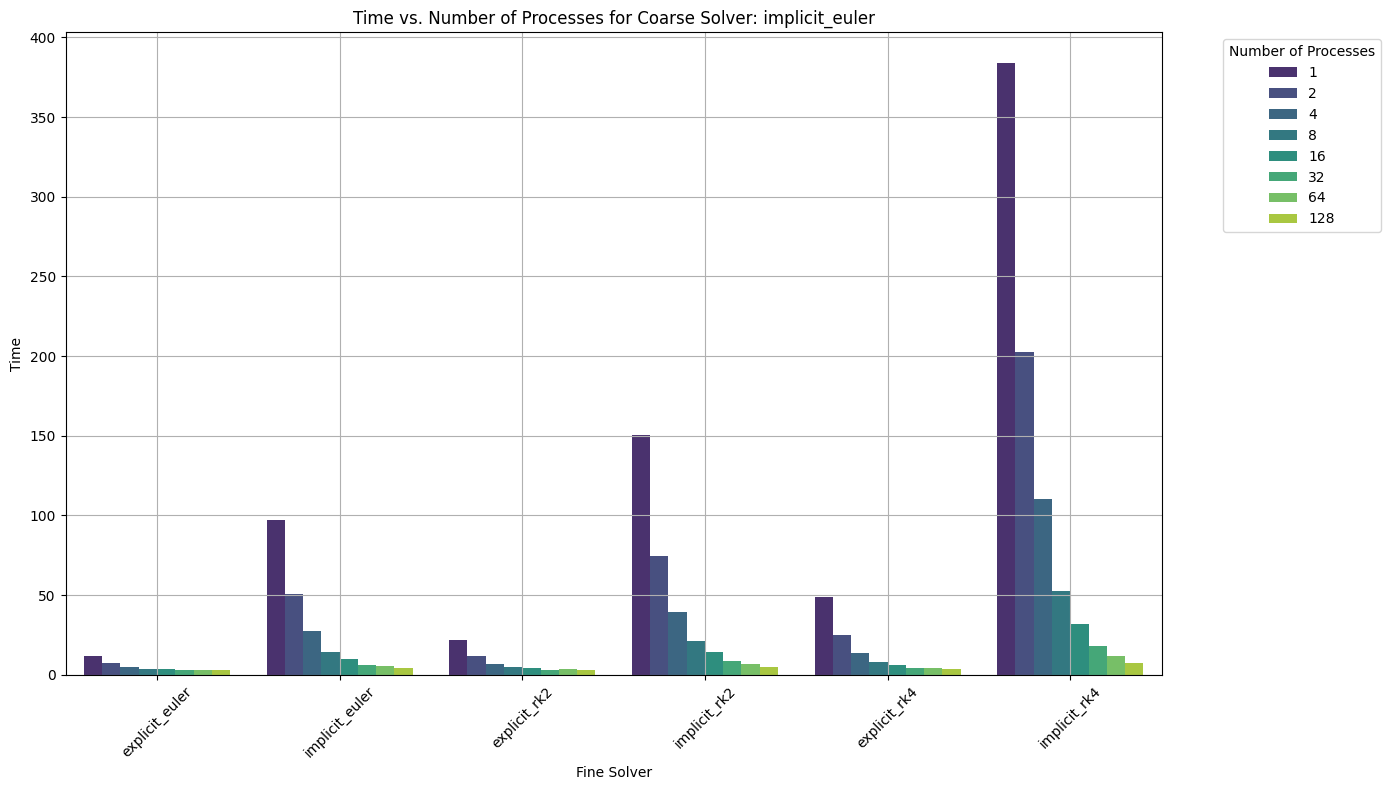

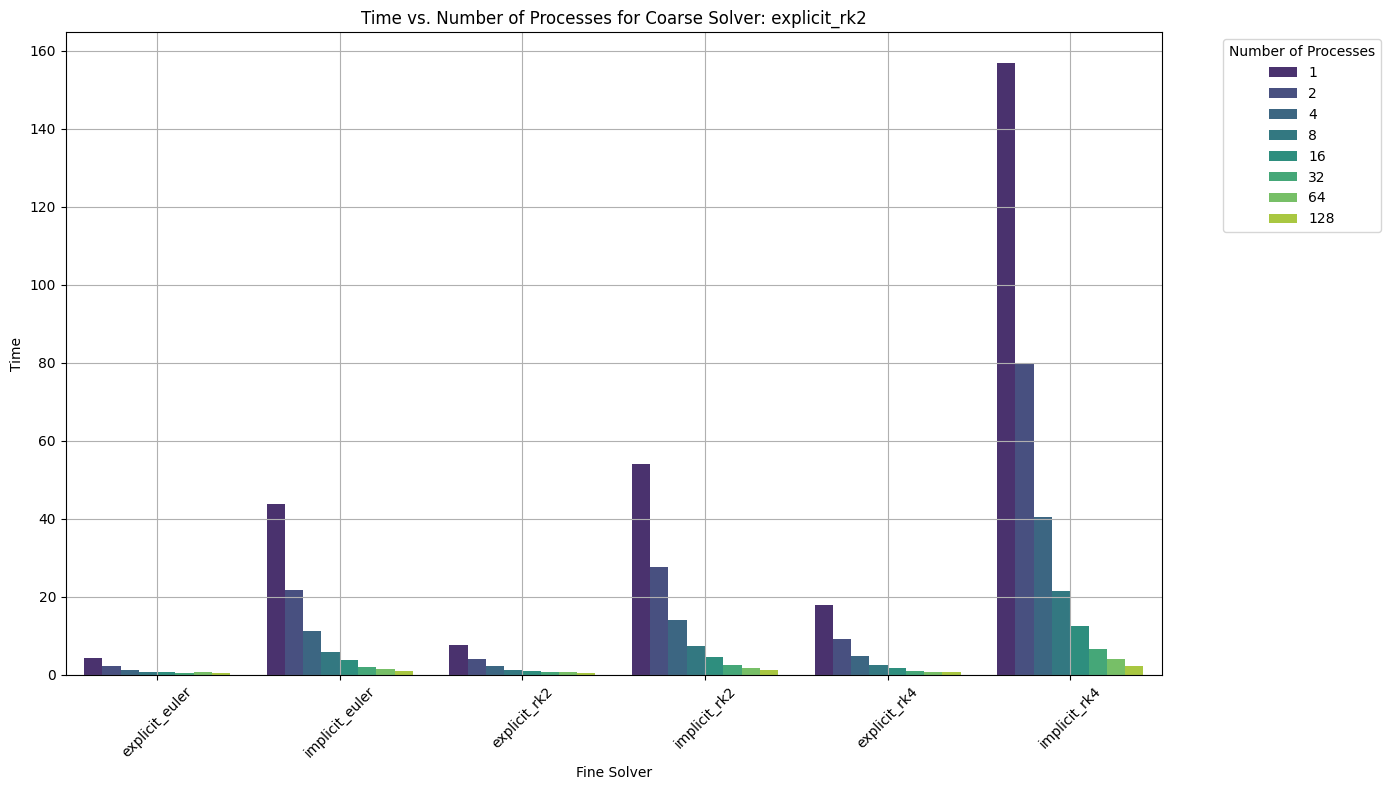

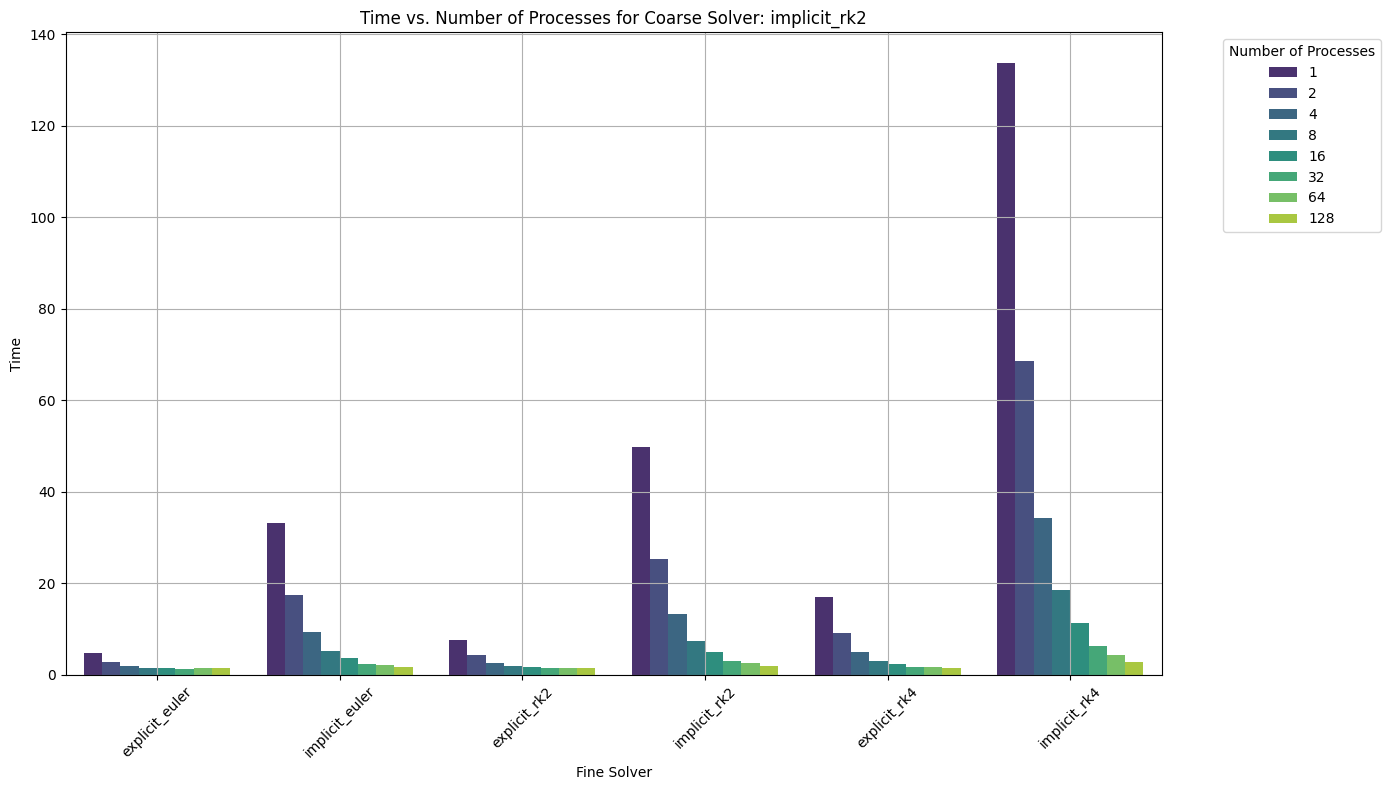

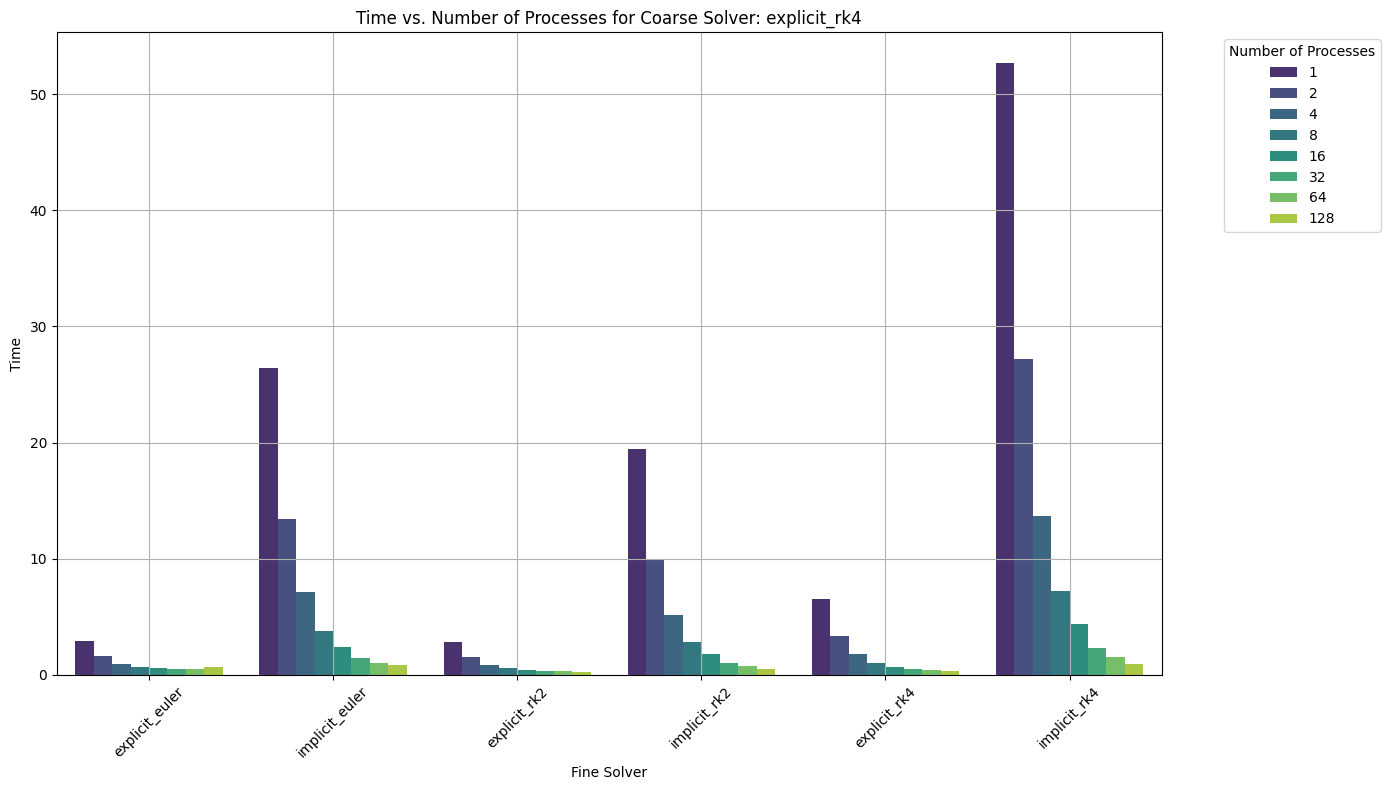

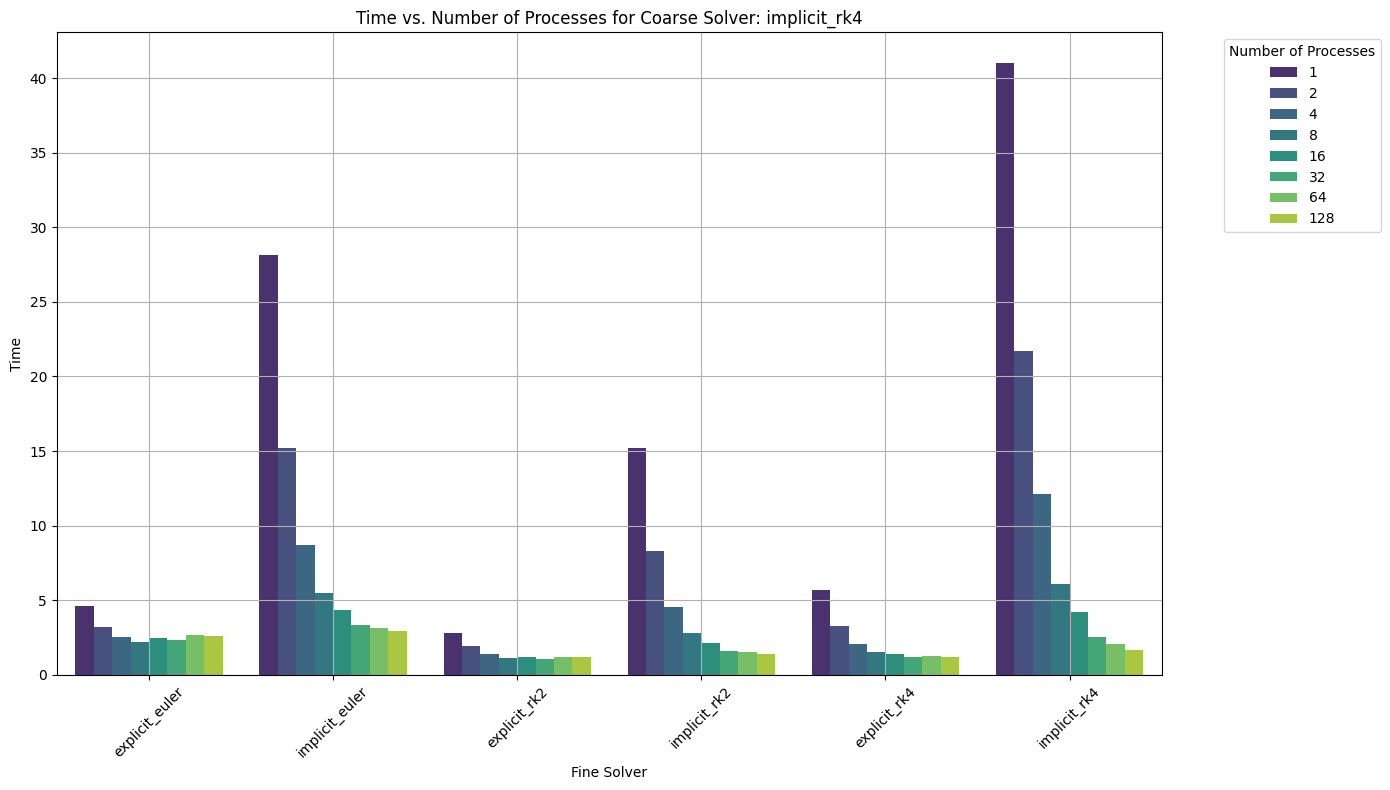

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Read execution times into a dataframe
data = pd.read_csv("./python/data/data_speedup_2024-07-15_14-45-51.txt", header=None, names=["processes", "G_solver", "F_solver", "time"])

# Ensure 'processes' column is of type int
data['processes'] = data['processes'].astype(str)

# List of unique G_solvers
g_solvers = data['G_solver'].unique()

# Create subplots for each G_solver
for g_solver in g_solvers:
    subset = data[data['G_solver'] == g_solver]
    
    plt.figure(figsize=(14, 8))
    sns.barplot(data=subset, x='F_solver', y='time', hue='processes',palette='viridis')
    
    plt.title(f'Time vs. Number of Processes for Coarse Solver: {g_solver}')
    plt.ylabel('Time')
    plt.xlabel('Fine Solver')
    plt.xticks(rotation=45)
    plt.legend(title='Number of Processes', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


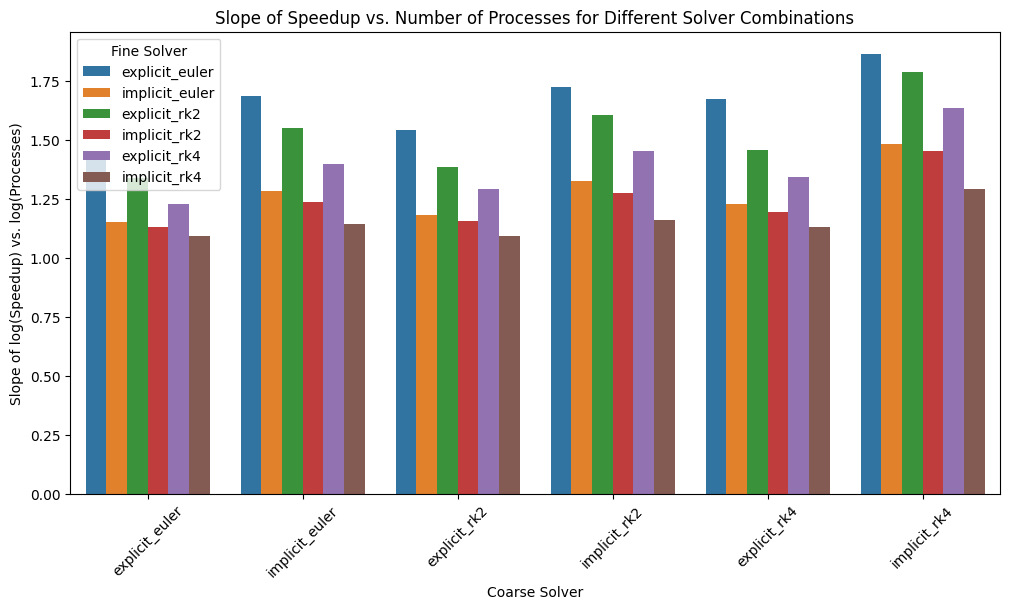

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from scipy.stats import linregress

# Read execution times into a dataframe
data = pd.read_csv("./python/data/data_speedup_2024-07-15_14-45-51.txt", header=None, names=["processes", "G_solver", "F_solver", "time"])

# Group by solver combination and get the reference time (1 process)
ref_times = data[data['processes'] == 1].set_index(['G_solver', 'F_solver'])['time']

# Calculate speedup for each row
data['speedup'] = data.apply(lambda row: ref_times.loc[row['G_solver'], row['F_solver']] / row['time'], axis=1)

# Function to compute the slope
def compute_slope(processes, speedup):
    #log_processes = np.log(processes)
    #log_speedup = np.log(speedup)
    #slope, _, _, _, _ = linregress(log_processes, log_speedup)
    processes = np.array(processes)
    speedup = np.array(speedup)
    convergence_rates = (speedup[:-1] / speedup[1:]) / (processes[:-1] / processes[1:])
    order_of_convergence = np.mean(convergence_rates)
    return order_of_convergence

# Calculate slopes for each solver combination
solver_combinations = data[['G_solver', 'F_solver']].drop_duplicates()
slopes = []

for _, (G_solver, F_solver) in solver_combinations.iterrows():
    solver_data = data[(data['G_solver'] == G_solver) & (data['F_solver'] == F_solver)]
    slope = compute_slope(solver_data['processes'], solver_data['speedup'])
    slopes.append((G_solver, F_solver, slope))

# Create a dataframe for slopes
slopes_df = pd.DataFrame(slopes, columns=['G_solver', 'F_solver', 'slope'])

# Plot the results using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=slopes_df, x='G_solver', y='slope', hue='F_solver')
plt.title('Slope of Speedup vs. Number of Processes for Different Solver Combinations')
plt.ylabel('Slope of log(Speedup) vs. log(Processes)')
plt.xlabel('Coarse Solver')
plt.xticks(rotation=45)
plt.legend(title='Fine Solver')
plt.show()
